# O conjunto de dados que iremos explorar fornece uma análise abrangente dos padrões de uso do dispositivo móvel e da classificação do comportamento do usuário. Ele contém 700 amostras de dados do usuário, incluindo métricas como tempo de uso do aplicativo, tempo de tela, fuga de bateria e consumo de dados.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Carregando e visualizando o dataset:

In [2]:
df = pd.read_csv("user_behavior_dataset.csv")

In [3]:
display(df)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


* Alterando o nome das colunas para português:

In [4]:
df.columns = ['ID_usuario',
            'Modelo_celular',
            'Sistema_operacional',
            'Tempo_de_uso_de_aplicativo_(min/dia)',
            'Tempo_de_ativação_da_tela_(horas/dia)',
            'Consumo_de_bateria_(mAh/dia)',
            'Apps_instalados',
            'Uso_de_dados_(MB/dia)',
            'Idade',
            'Gênero',
            'Classe_de_comportamento_do_usuario']

In [5]:
display(df)

,ID_usuario,Modelo_celular,Sistema_operacional,Tempo_de_uso_de_aplicativo_(min/dia),Tempo_de_ativação_da_tela_(horas/dia),Consumo_de_bateria_(mAh/dia),Apps_instalados,Uso_de_dados_(MB/dia),Idade,Gênero,Classe_de_comportamento_do_usuario
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


* 1.Calculando estatísticas descritivas para as variaveis númericas: 

In [6]:
display(df.describe().round(2))

,ID_usuario,Tempo_de_uso_de_aplicativo_(min/dia),Tempo_de_ativação_da_tela_(horas/dia),Consumo_de_bateria_(mAh/dia),Apps_instalados,Uso_de_dados_(MB/dia),Idade,Classe_de_comportamento_do_usuario
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,350.50,271.13,5.27,1525.16,50.68,929.74,38.48,2.99
std,202.22,177.20,3.07,819.14,26.94,640.45,12.01,1.40
min,1.00,30.00,1.00,302.00,10.00,102.00,18.00,1.00
25%,175.75,113.25,2.50,722.25,26.00,373.00,28.00,2.00
50%,350.50,227.50,4.90,1502.50,49.00,823.50,38.00,3.00
75%,525.25,434.25,7.40,2229.50,74.00,1341.00,49.00,4.00
max,700.00,598.00,12.00,2993.00,99.00,2497.00,59.00,5.00


* Criando um histograma para observa a distribuição do tempo de uso de aplicativos(em minutos):

In [7]:
distribuicao_APP = df['Tempo_de_uso_de_aplicativo_(min/dia)']

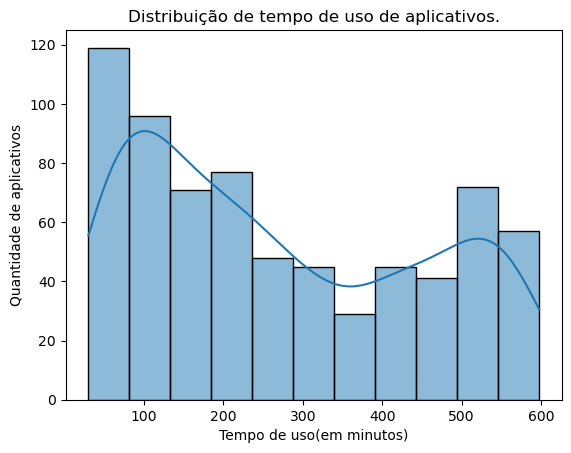

In [8]:
sns.histplot(distribuicao_APP, kde=True)
plt.title('Distribuição de tempo de uso de aplicativos.')
plt.xlabel('Tempo de uso(em minutos)')
plt.ylabel('Quantidade de aplicativos')
plt.show()

* 3.Correlação entre consumo de bateria e tempo de uso de aplicativos:  

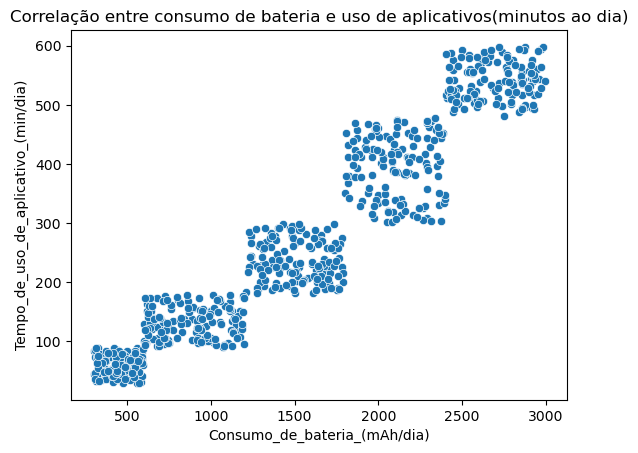

In [9]:
sns.scatterplot(x='Consumo_de_bateria_(mAh/dia)', y='Tempo_de_uso_de_aplicativo_(min/dia)', data=df)
plt.title('Correlação entre consumo de bateria e uso de aplicativos(minutos ao dia)')
plt.show()

* 4.Comparação entre o tempo médio de uso de aplicativos entre usuários de Android e iOS.

In [10]:
#tempo_de_uso_SO = df.groupby('Sistema_operacional')["Tempo_de_ativação_da_tela_(horas/dia)"].mean().round(2)

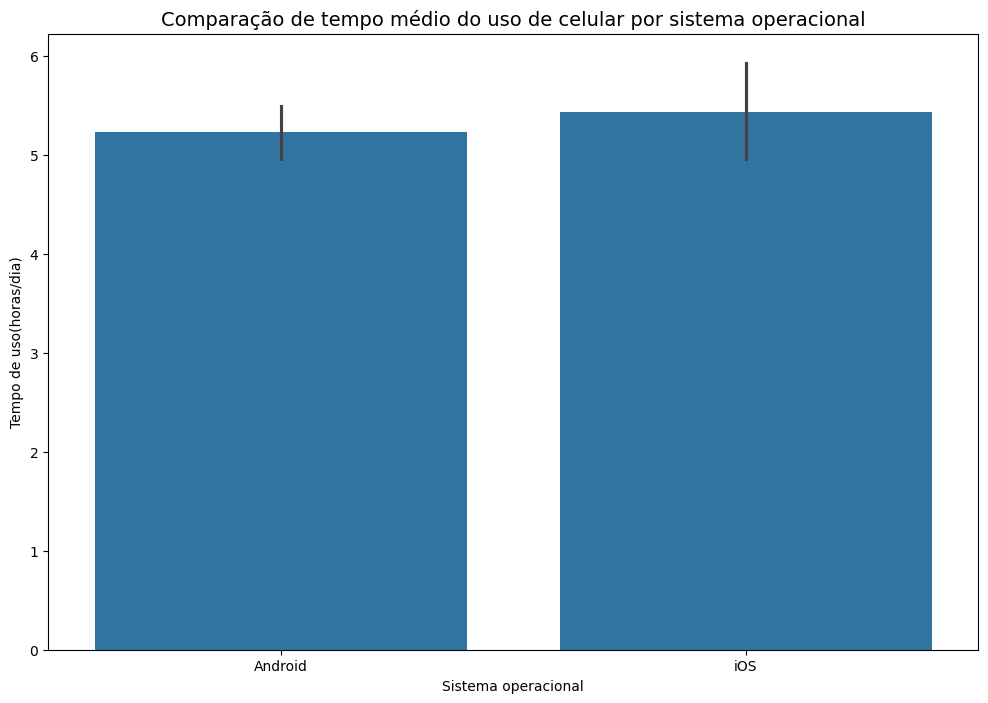

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x='Sistema_operacional', y='Tempo_de_ativação_da_tela_(horas/dia)',data=df)
plt.title('Comparação de tempo médio do uso de celular por sistema operacional', fontsize=14)
plt.xlabel('Sistema operacional')
plt.ylabel('Tempo de uso(horas/dia)')
plt.show()

* 5.Vamos visualizar se há diferença no consumo de dados entre homens e mulheres. 

In [12]:
# Alterando os valores na coluna Gênero:  
dic_gênero = {'Male': 'Masculino', 'Female': 'Feminino'}
df['Gênero'] = df['Gênero'].map(dic_gênero)

/tmp/ipykernel_4997/1773499022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gênero', y='Uso_de_dados_(MB/dia)', data=df, palette='Set2')


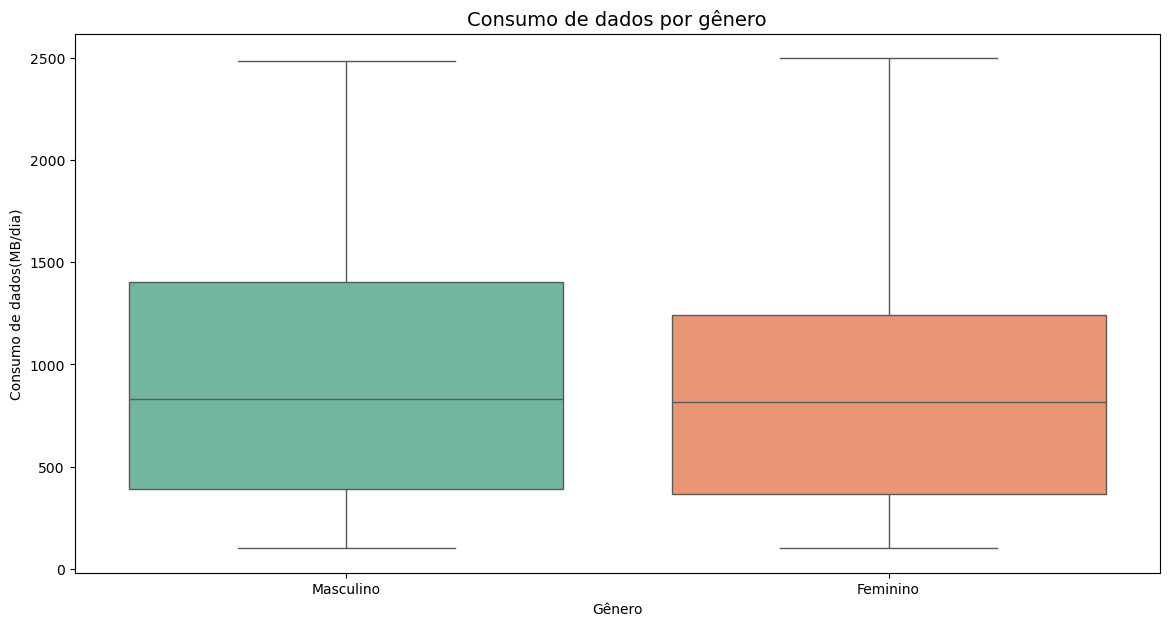

In [13]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Gênero', y='Uso_de_dados_(MB/dia)', data=df, palette='Set2')
plt.title('Consumo de dados por gênero', fontsize=14)
plt.xlabel('Gênero')
plt.ylabel('Consumo de dados(MB/dia)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

* 6.Vamos dividir os usuários por faixa etária para visualizar se há diferença no número médio de apps instalados.

In [14]:
# Segmentando as idades:
df['Faixa_etária'] = pd.cut(df['Idade'], bins=[0, 25, 40, float('inf')], labels=['Menor de 25', '25-40', 'Mais de 40'],right=False)

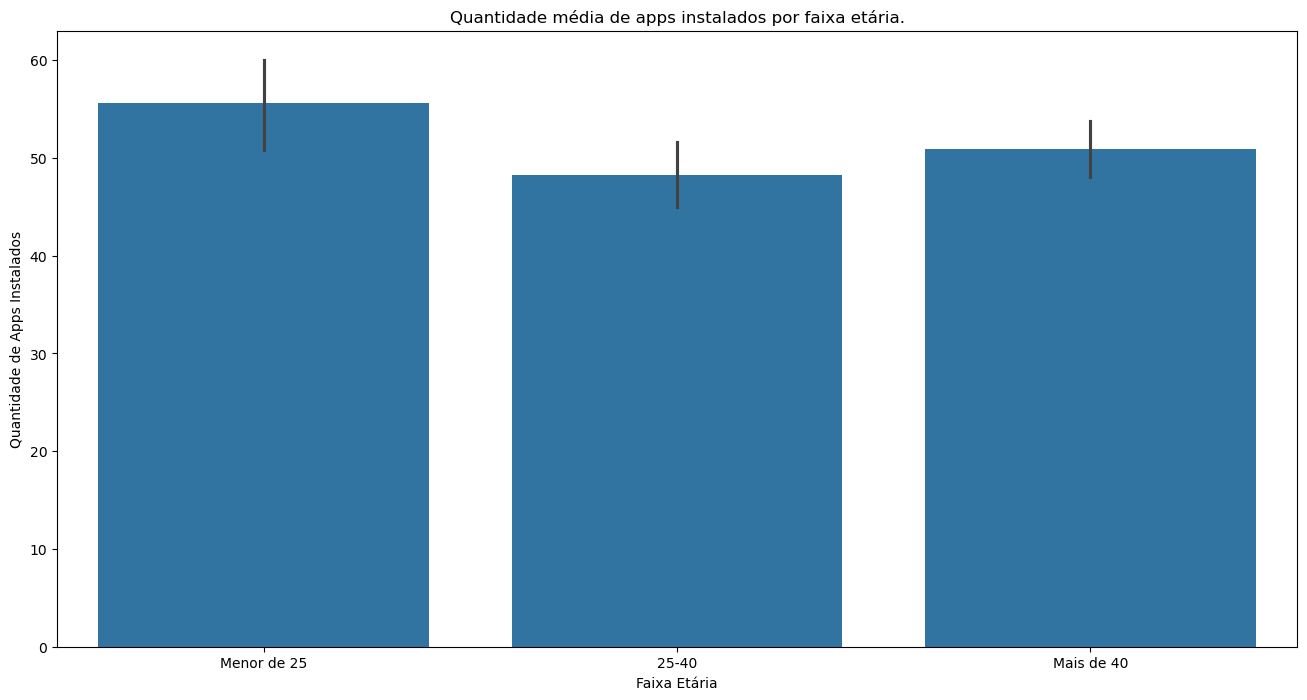

In [15]:
# Criando um gráfico para visualização:
plt.figure(figsize=(16,8))
sns.barplot(x='Faixa_etária', y='Apps_instalados', data=df)
plt.title('Quantidade média de apps instalados por faixa etária.')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Apps Instalados')
plt.show()

* 7.Identificando outliers no consumo de dados e no tempo de uso de apps.

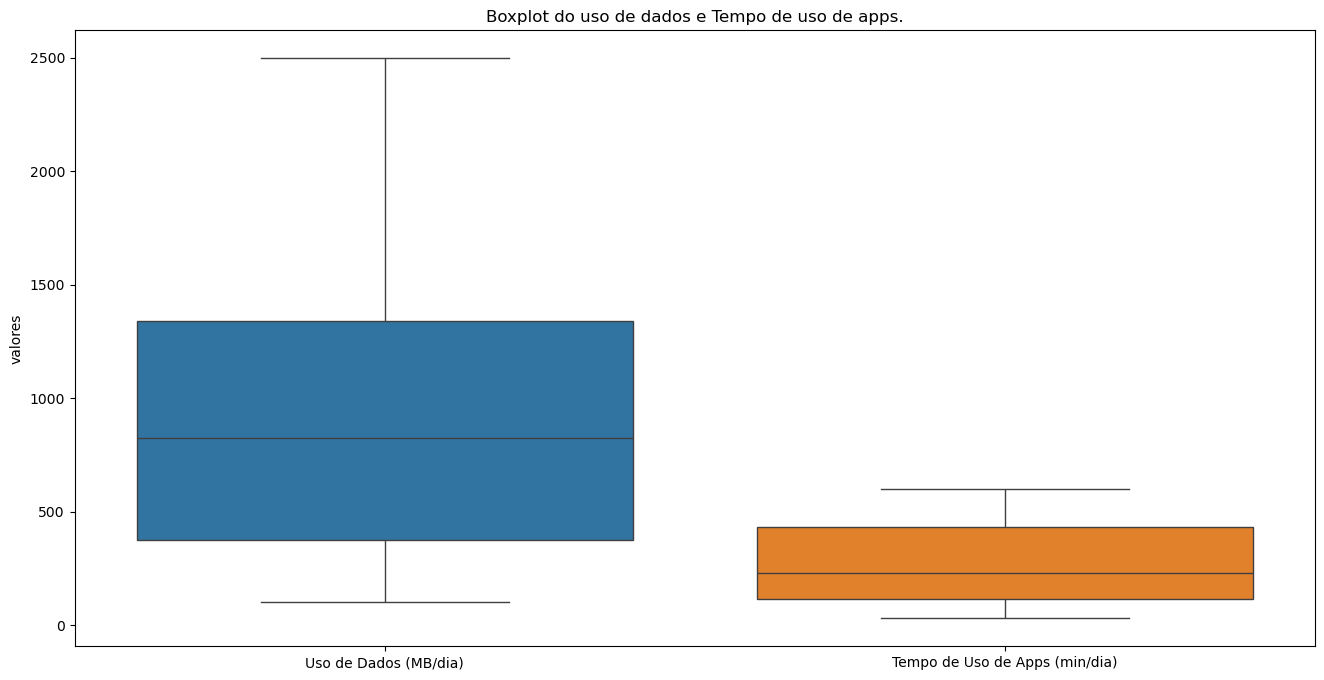

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df[['Uso_de_dados_(MB/dia)', 'Tempo_de_uso_de_aplicativo_(min/dia)']])
plt.xticks([0, 1], ['Uso de Dados (MB/dia)', 'Tempo de Uso de Apps (min/dia)'])
plt.ylabel('valores')
plt.title('Boxplot do uso de dados e Tempo de uso de apps.')
plt.show()

In [17]:
# Outra alternativa na detecção de outliers dessas variáveis:

# Coluna 1: Uso de dados (MB/dia)
Q1_dados = df['Uso_de_dados_(MB/dia)'].quantile(0.25)
Q3_dados = df['Uso_de_dados_(MB/dia)'].quantile(0.75)
IQR_dados = Q3_dados - Q1_dados

outliers_dados = df[(df['Uso_de_dados_(MB/dia)'] < (Q1_dados - 1.5 * IQR_dados)) | 
                    (df['Uso_de_dados_(MB/dia)'] > (Q3_dados + 1.5 * IQR_dados))]

# Coluna 2: Tempo de uso de aplicativos (min/dia)
Q1_tempo = df['Tempo_de_uso_de_aplicativo_(min/dia)'].quantile(0.25)
Q3_tempo = df['Tempo_de_uso_de_aplicativo_(min/dia)'].quantile(0.75)
IQR_tempo = Q3_tempo - Q1_tempo

outliers_tempo = df[(df['Tempo_de_uso_de_aplicativo_(min/dia)'] < (Q1_tempo - 1.5 * IQR_tempo)) | 
                    (df['Tempo_de_uso_de_aplicativo_(min/dia)'] > (Q3_tempo + 1.5 * IQR_tempo))]

# Imprimindo os outliers
print("Outliers - Uso de Dados (MB/dia):")
display(outliers_dados)

print("\nOutliers - Tempo de Uso de Aplicativos (min/dia):")
display(outliers_tempo)


Outliers - Uso de Dados (MB/dia):


,ID_usuario,Modelo_celular,Sistema_operacional,Tempo_de_uso_de_aplicativo_(min/dia),Tempo_de_ativação_da_tela_(horas/dia),Consumo_de_bateria_(mAh/dia),Apps_instalados,Uso_de_dados_(MB/dia),Idade,Gênero,Classe_de_comportamento_do_usuario,Faixa_etária



Outliers - Tempo de Uso de Aplicativos (min/dia):


,ID_usuario,Modelo_celular,Sistema_operacional,Tempo_de_uso_de_aplicativo_(min/dia),Tempo_de_ativação_da_tela_(horas/dia),Consumo_de_bateria_(mAh/dia),Apps_instalados,Uso_de_dados_(MB/dia),Idade,Gênero,Classe_de_comportamento_do_usuario,Faixa_etária


* 8.Vamos analisar a distribuição das classes de comportamento do usuário. 

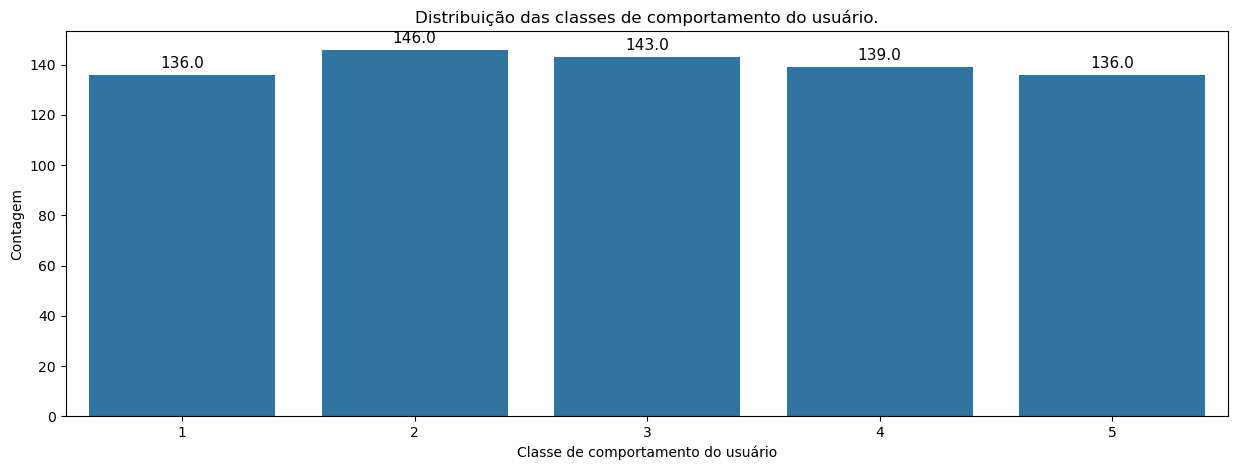

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['Classe_de_comportamento_do_usuario'], data=df)
plt.title('Distribuição das classes de comportamento do usuário.')
plt.xlabel('Classe de comportamento do usuário')
plt.ylabel('Contagem')
# Adicionando a contagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

* 9.Vamos elaborar um mapa de calor para ver a relação entre as variáveis númericas.

In [23]:
# Vamos selecionar somente algumas colunas númericas do nosso DataFrame:
colunas_desejadas = ["Tempo_de_uso_de_aplicativo_(min/dia)", 
                     "Tempo_de_ativação_da_tela_(horas/dia)", 
                     "Consumo_de_bateria_(mAh/dia)", 
                     "Apps_instalados", "Uso_de_dados_(MB/dia)", 
                     "Idade",
                     "Classe_de_comportamento_do_usuario"]



In [25]:
df_colunas = df[colunas_desejadas]

In [26]:
# vamos calcular a mtriz de correlação, soemente para variáveis númericas:
matriz_corr = df_colunas.corr()

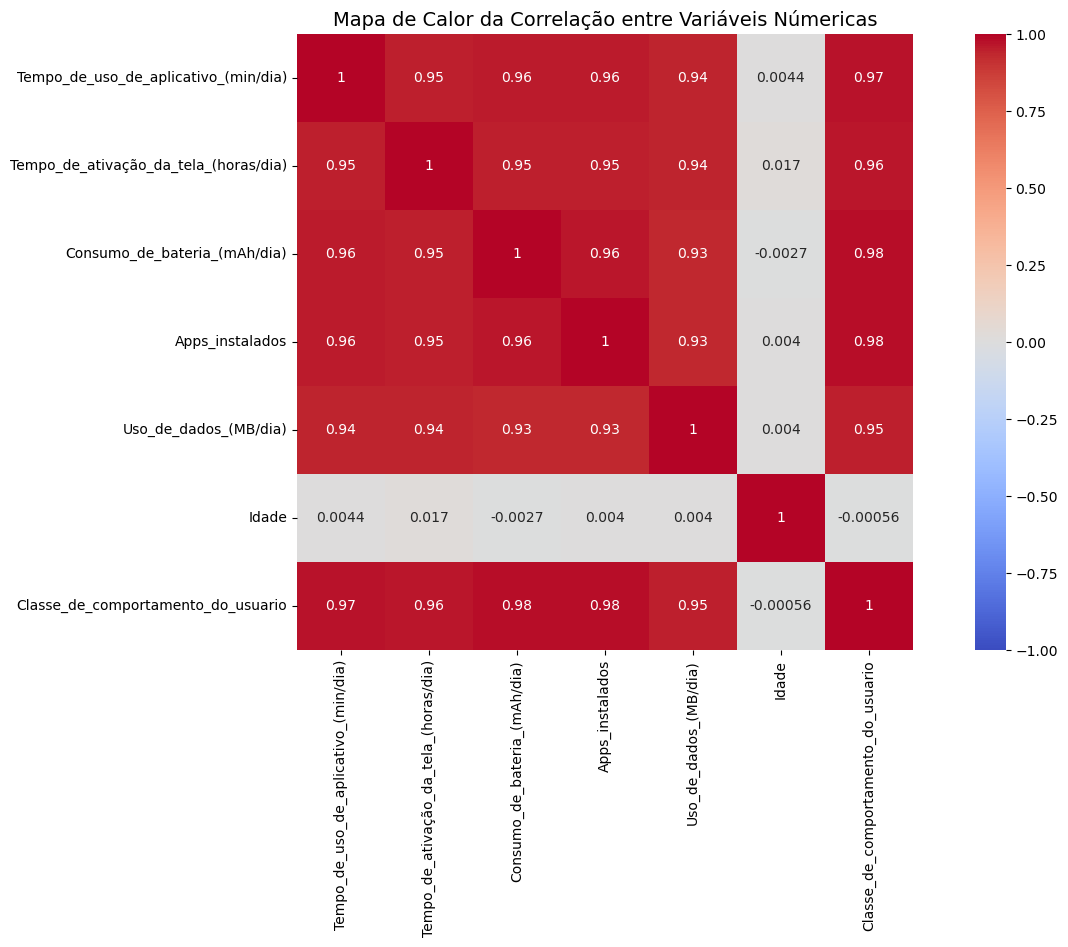

In [27]:
# Vamos plotar mapa de calor:
plt.figure(figsize=(16,8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title('Mapa de Calor da Correlação entre Variáveis Númericas', fontsize=14)
plt.show()

* 10.Vamos análisar o consumo diário de celular por gênero e faixa etária. 

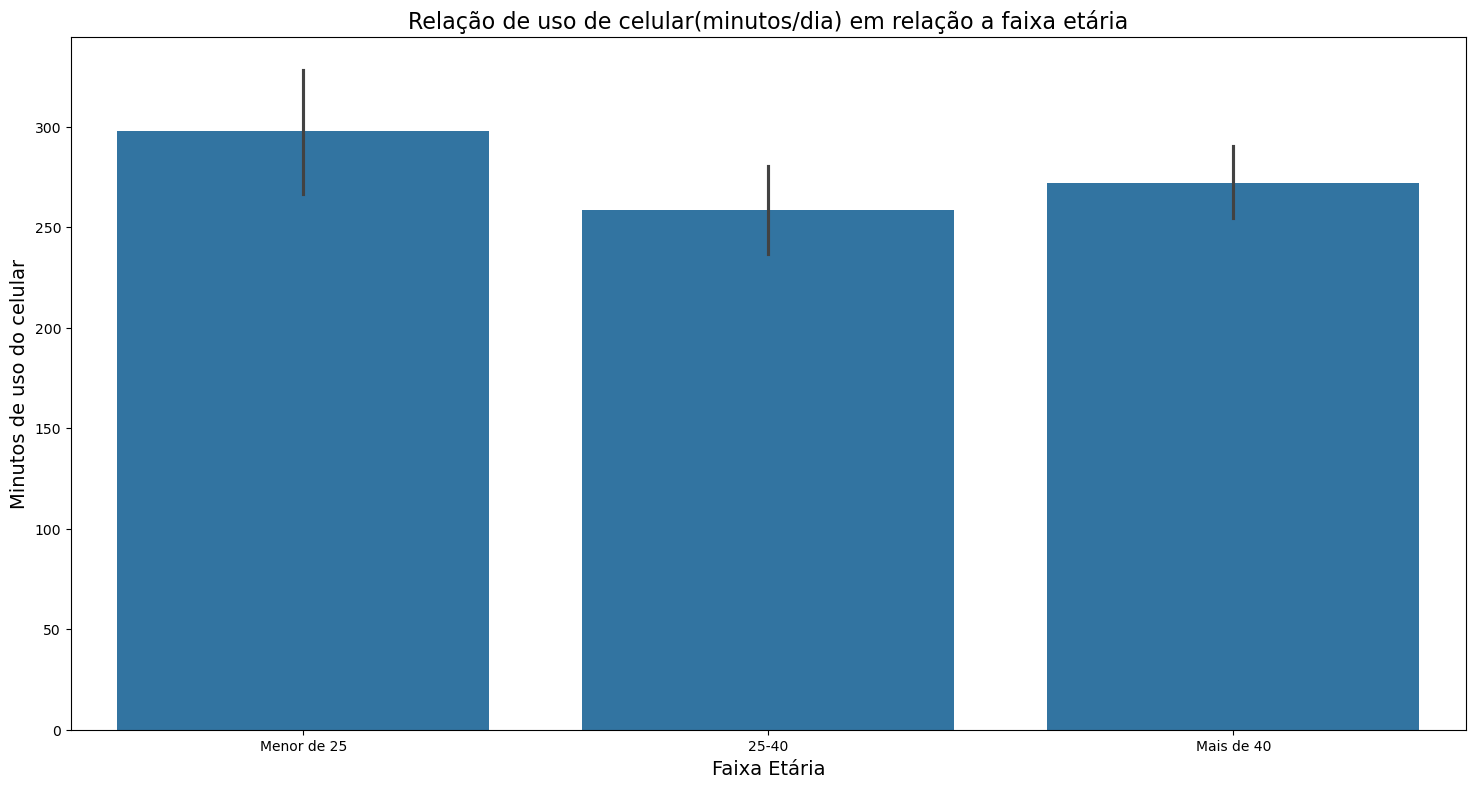

In [31]:
# Vamos analisar a relação Minutos de uso do celular/Faixa etária:
plt.figure(figsize=(18,9))
sns.barplot(x="Faixa_etária", y="Tempo_de_uso_de_aplicativo_(min/dia)", data=df)
plt.title('Relação de uso de celular(minutos/dia) em relação a faixa etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Minutos de uso do celular', fontsize=14)
plt.show()

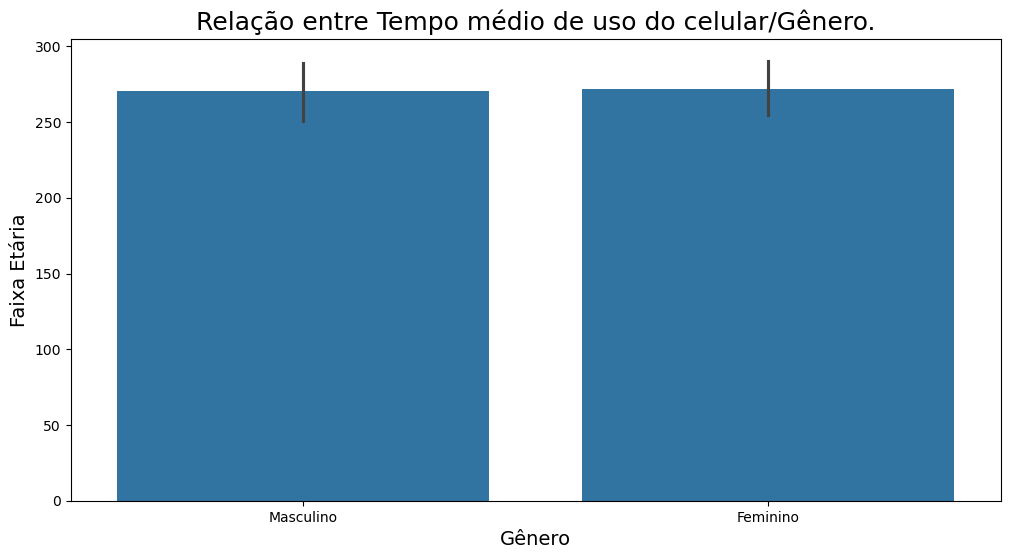

In [50]:
# vamos analisar a relação Minutos de uso do celular/Gênero:
plt.figure(figsize=(12,6))
sns.barplot(x='Gênero', y='Tempo_de_uso_de_aplicativo_(min/dia)', data=df)
plt.title('Relação entre Tempo médio de uso do celular/Gênero.', fontsize=18)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Faixa Etária', fontsize=14)
plt.show()

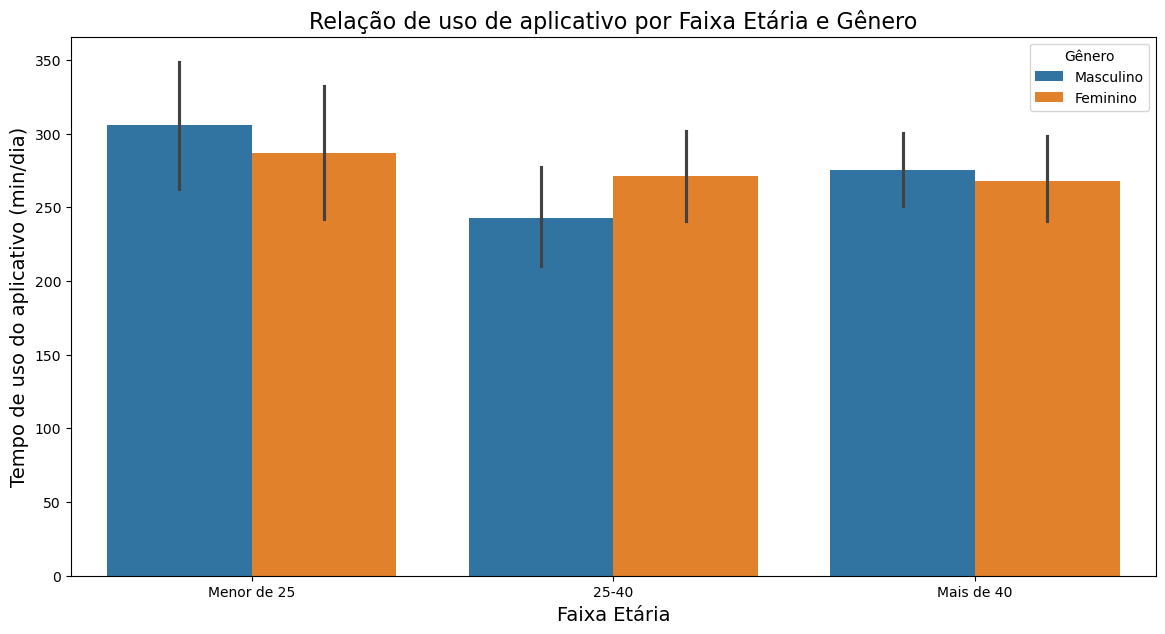

In [51]:
# Análise geral:
plt.figure(figsize=(14,7))
sns.barplot(x="Faixa_etária", y="Tempo_de_uso_de_aplicativo_(min/dia)", hue="Gênero", data=df)
plt.title('Relação de uso de aplicativo por Faixa Etária e Gênero', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Tempo de uso do aplicativo (min/dia)', fontsize=14)
plt.legend(title='Gênero')
plt.show()
